# Разности и лаги

In [17]:
import numpy as np
import pandas as pd 

import pandas_datareader.data as web

from sktime.utils.plotting import plot_series, plot_lags

# настройки визуализация
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Пример 1 (первая разности)
Загрузим из БД [`FRED`](https://fred.stlouisfed.org/) месячные данные по M2 (Symbol [`M2SL`](https://fred.stlouisfed.org/series/M2SL)) с 1990-01 по 2023-12 и создадим датафрейм `m2`

In [18]:
m2 = web.DataReader(name='M2SL', data_source='fred', start='1990-01', end='2023-12')
m2.index = pd.period_range(start='1990-01', end='2023-12', freq='M')
m2.columns = ['M2']
m2

,M2
1990-01,3166.8
1990-02,3179.2
1990-03,3190.1
1990-04,3201.6
1990-05,3200.6
...,...
2023-08,20798.4
2023-09,20723.7
2023-10,20690.5
2023-11,20730.0


In [19]:
# первая разность
m2.diff()

,M2
1990-01,NaN
1990-02,12.4
1990-03,10.9
1990-04,11.5
1990-05,-1.0
...,...
2023-08,-43.4
2023-09,-74.7
2023-10,-33.2
2023-11,39.5


In [20]:
# вторая разность
m2.diff().diff()

,M2
1990-01,NaN
1990-02,NaN
1990-03,-1.5
1990-04,0.6
1990-05,-12.5
...,...
2023-08,-49.5
2023-09,-31.3
2023-10,41.5
2023-11,72.7


In [21]:
# log-доходность
np.log(m2).diff()

,M2
1990-01,NaN
1990-02,0.003908
1990-03,0.003423
1990-04,0.003598
1990-05,-0.000312
...,...
2023-08,-0.002085
2023-09,-0.003598
2023-10,-0.001603
2023-11,0.001907


Визуализируем с разными стиля (предопрелённные стили см. [здесь](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html))

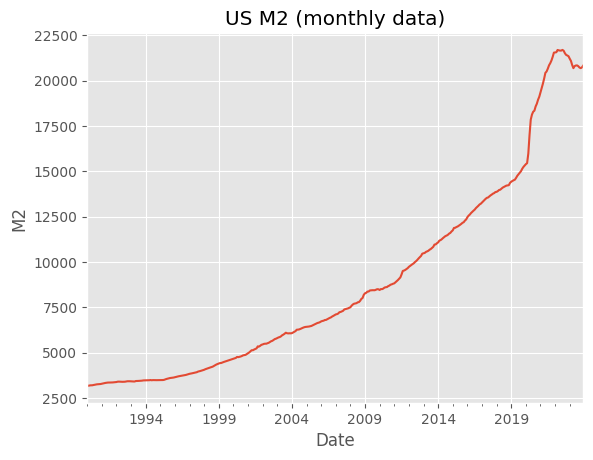

In [22]:
plt.style.use('ggplot')

ax = m2.plot()
ax.set_title('US M2 (monthly data)')
ax.set_ylabel('M2')
ax.set_xlabel('Date')
ax.legend().remove()

plt.show()

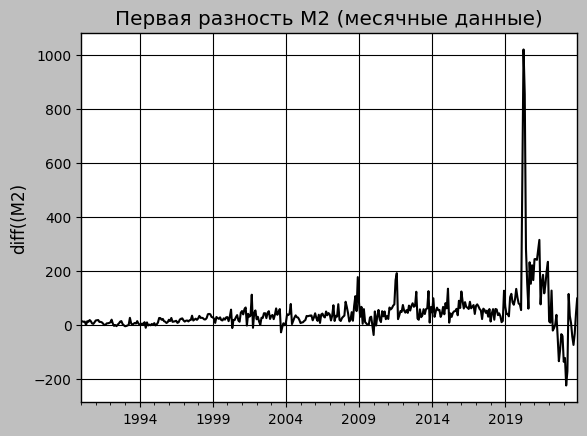

In [23]:
plt.style.use('grayscale')

ax = m2.diff().plot()
ax.set_title('Первая разность M2 (месячные данные)')
ax.set_ylabel('diff((M2)')
ax.legend().remove()

plt.show()

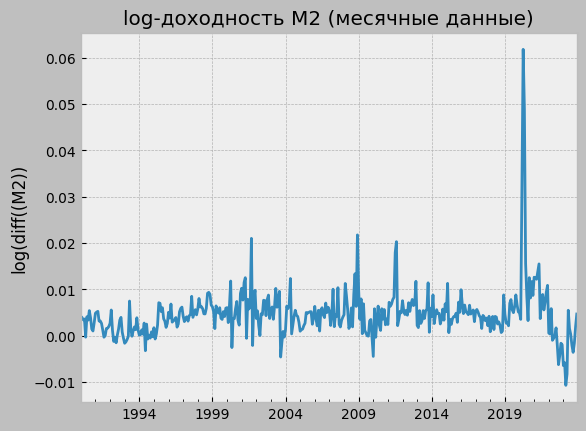

In [24]:
plt.style.use('bmh')

ax = np.log(m2).diff().plot()
ax.set_title('log-доходность M2 (месячные данные)')
ax.set_ylabel('log(diff((M2))')
ax.legend().remove()

plt.show()

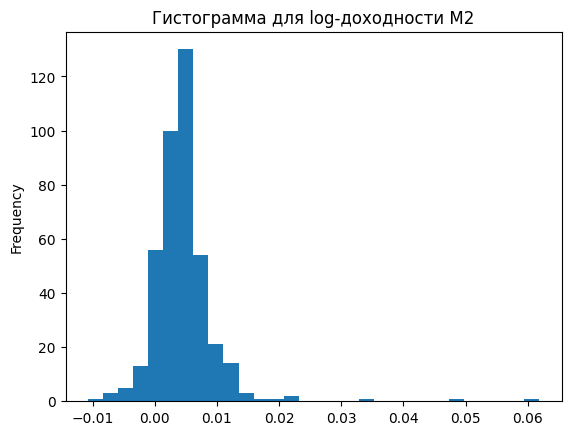

In [25]:
# гистограмма для log-доходности
plt.style.use('default')
ax = np.log(m2).diff().plot.hist(bins=30)
ax.set_title('Гистограмма для log-доходности M2')
ax.legend().remove()

plt.show()

## Пример 2 (лаги)

Загрузим из БД [`FRED`](https://fred.stlouisfed.org/) месячные данные по 3-Month Treasury Bill Secondary Market Rate (Symbol [`TB3MS`](https://fred.stlouisfed.org/series/TB3MS)) с 1990-01 по 2023-12

In [27]:
y = web.DataReader(name='TB3MS', data_source='fred',start='1990-01', end='2023-12')
y.index = pd.period_range(start='1990-01', end='2023-12', freq='M')
y.columns = ['3Mrate']
y

,3Mrate
1990-01,7.64
1990-02,7.74
1990-03,7.90
1990-04,7.77
1990-05,7.74
...,...
2023-08,5.30
2023-09,5.32
2023-10,5.34
2023-11,5.27


(<Figure size 800x600 with 1 Axes>,
 array([<Axes: xlabel='y(t)', ylabel='y(t + 1)'>], dtype=object))

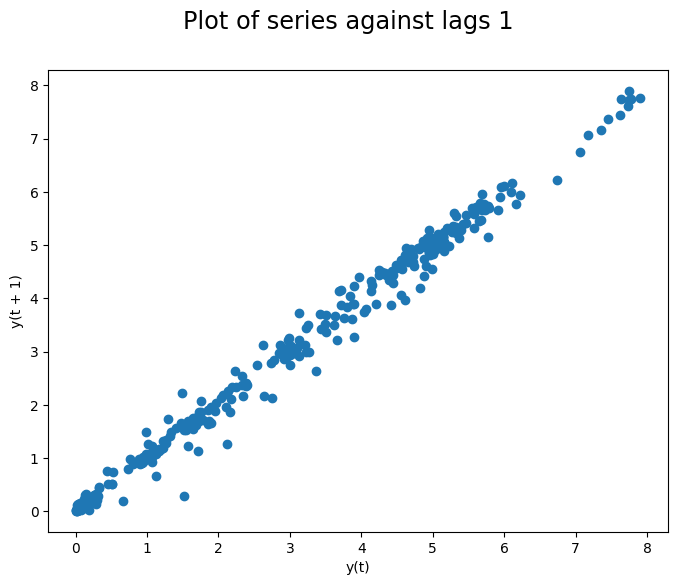

In [28]:
plot_lags(y, lags=1)

plt.show()

(<Figure size 800x600 with 1 Axes>,
 array([<Axes: xlabel='y(t)', ylabel='y(t + 1)'>], dtype=object))

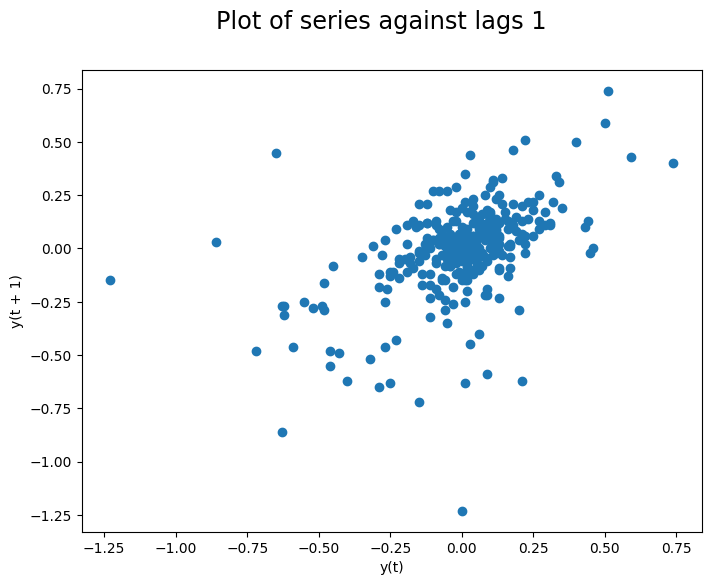

In [29]:
plot_lags(y.diff().dropna(), lags=1)

plt.show()

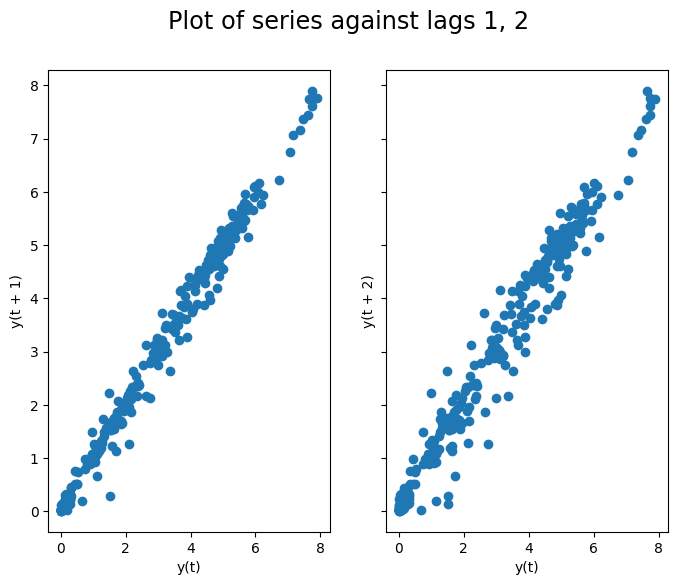

In [30]:
plot_lags(y, lags=[1,2])

plt.show()

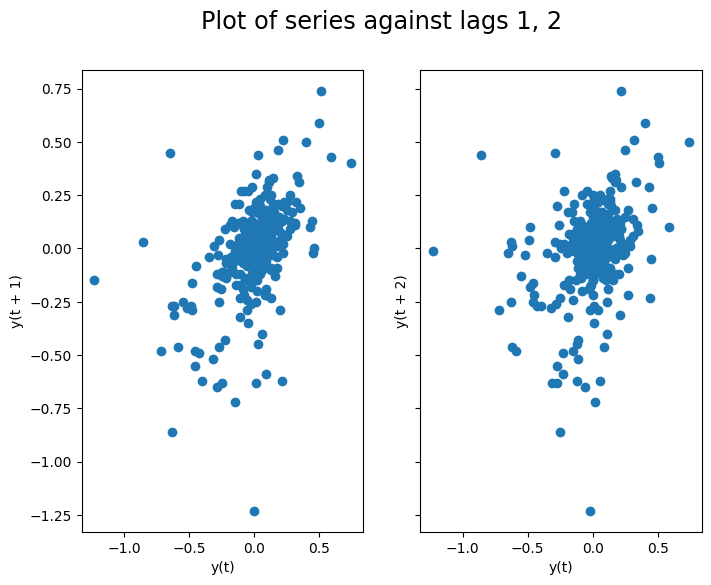

In [31]:
plot_lags(y.diff().dropna(), lags=[1,2])

plt.show()

In [32]:
# Добавим лаг в датасету
y['lag_3Mrate'] = y['3Mrate'].shift()
y.corr()

,3Mrate,lag_3Mrate
3Mrate,1.00000,0.99626
lag_3Mrate,0.99626,1.00000
